# Recording in long simulations

A memory overflow can happen when recording in long simulations.
longrun_neuron_monitors can be used in these scenario.

### Set new cortex model instance from scratch or from a previously saved setup (e.g. in Tutorial-1).

The following variables are necessary regarldess if you set the instance from scrach or if you load previous data.

In [1]:
from pfc_model import *

In [2]:
constant_stimuli = [
                    (('PC', 0), 250), # Each pyramidal cell receives constant 250 pA input.
                    (('IN', 0), 200),# Each interneuron receives constant 200 pA input.
                    ]
method = 'rk4'
dt = 0.05

transient is optional (if not given, it defaults to 0). If not specified otherwise, monitors will begin to record after transient period.

In [3]:
transient = 1000

The following variables will be used only if you set a new instance from scratch.

In [4]:
n_cells = 1000
n_stripes = 1
seed = 0

In [6]:
set_cortex = input('If you want to load a previously saved setup, type the directory name. Else, press enter to skip.\n')
if set_cortex == '':
    cortex=Cortex.setup(n_cells=n_cells, n_stripes=n_stripes, 
                    constant_stimuli=constant_stimuli, method=method,
                    dt=dt,seed=seed, transient=transient        
                    )
else:
    cortex = Cortex.load(set_cortex, constant_stimuli, method, dt, transient=transient)


If you want to load a previously saved setup, type the directory name. Else, press enter to skip.
Tutorial-1_3
--------------------                                                 
|   TIME REPORT:   | Starting Cortex setup (with network loading) ...
--------------------                                                 

REPORT: Loading Network from Tutorial-1_3

--------------------                          
|   TIME REPORT:   | Starting Basics setup ...
--------------------                          

REPORT: The number of neurons was adjusted from 1000 to 1003 due to roundings.

--------------------------------------------------------
|------------------------------------------------------|
||   TIME REPORT: Basics setup completed in 2.66 s.   ||
|------------------------------------------------------|
--------------------------------------------------------

REPORT: Network loaded from Tutorial-1_3

-------------------------------------------------------------------------------
|----

### Set long run monitors for I_tot and a_syn


Beside name, variable and recording indices, you have to declare the intervals(in ms) of recording and whether the variables should be recorded as populational mean or sum. You can alson declare start and stop time.

In [7]:
ALL = cortex.neuron_idcs(('ALL', 0))
cortex.set_longrun_neuron_monitors(name='I_tot', variables='I_tot', neuron_idcs=ALL,  
                                   interval=5000, start=11000, stop=21000,
                                    population_agroupate='sum')

syn_idc = cortex.syn_idcs_from_groups(('PC_L23', 0), ('PC_L23', 0)) 
cortex.set_longrun_synapse_monitors(name='a_syn', variables='a_syn', syn_idcs=syn_idc[:100],
                                    interval=5000, start=1000, stop=11000)
    

### Run a simulation
The argument is the duration of simulation in ms.

In [8]:
cortex.run(21000)

--------------------                               
|   TIME REPORT:   | Starting Cortex simulation ...
--------------------                               

......................................
::   REPORT: Preparing simulation   ::
......................................

Time step: 0.05 ms
Integration method: rk4
Seed: 0

Start time: 0.0 ms
Stop time: 21000.0 ms
Total duration : 21000.00 ms (from 0.00 to 21000.00 ms)

Simulation points: 0.0 ms, 1000.0 ms, 6000.0 ms, 11000.0 ms, 16000.0 ms, 21000.0 ms
5 simulation segment(s) of duration: 1000.0, 5000.0, 5000.0, 5000.0, 5000.0 ms

.......................................................
::   Preparing segment 1 out of 5                    ::
::   Duration 1000.00 ms (from 0.00 to 1000.00 ms)   ::
.......................................................

Starting simulation at t=0. s for a duration of 1. s
0.5898 s (58%) simulated in 10s, estimated 7s remaining.
1. s (100%) simulated in 16s
...............................................

### Retrieve monitor recordings

Neuron monitors are stored in cortex.recorded and in cortex.neuron_monitors; synapse monitors are stored in cortex.recorded and in cortex.synapse_monitors.

In [11]:
print('cortex.recorded.I_tot is cortex.neuron_monitors.I_tot:', cortex.recorded.I_tot is cortex.neuron_monitors.I_tot)
print('cortex.recorded.I_tot:', cortex.recorded.I_tot)
print()
print('cortex.recorded.a_syn is cortex.synapse_monitors.a_syn:', cortex.recorded.a_syn is cortex.synapse_monitors.a_syn)
print('cortex.recorded.a_syn:', cortex.recorded.a_syn)

cortex.recorded.I_tot is cortex.neuron_monitors.I_tot: True
cortex.recorded.I_tot: _NetworkHolder()

cortex.recorded.a_syn is cortex.synapse_monitors.a_syn: True
cortex.recorded.a_syn: _NetworkHolder()


I_tot was recorded as populational sum.

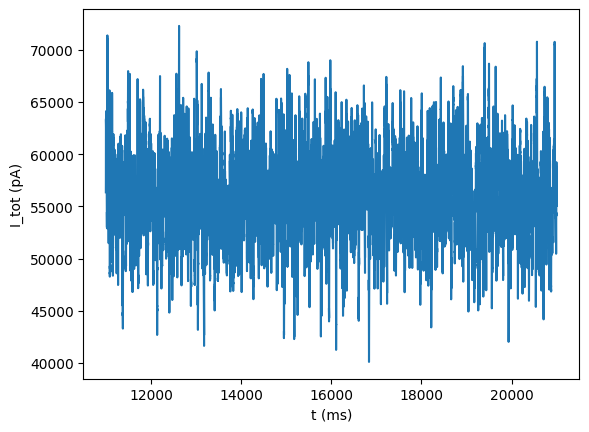

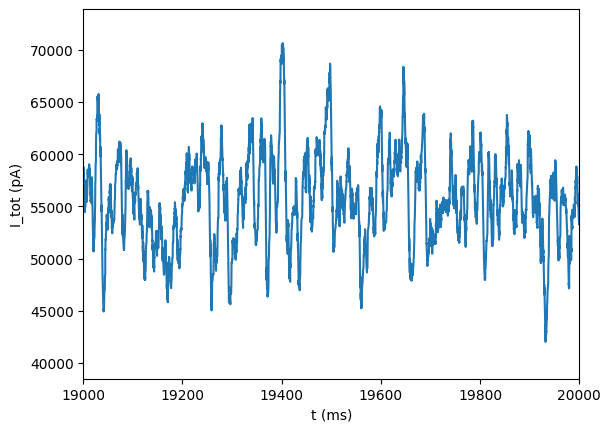

In [12]:
tI_tot = cortex.recorded.I_tot.t/br2.ms
I_tot = cortex.recorded.I_tot.I_tot/br2.pA
plt.plot(tI_tot, I_tot)
plt.xlabel('t (ms)')
plt.ylabel('I_tot (pA)')
plt.show()
plt.plot(tI_tot, I_tot)
plt.xlabel('t (ms)')
plt.ylabel('I_tot (pA)')
plt.xlim(19000, 20000)
plt.show()

LFP is estimated as the sum of synaptic current.
The values are inverted so that a descent in the signal represents current influx and populational excitation.

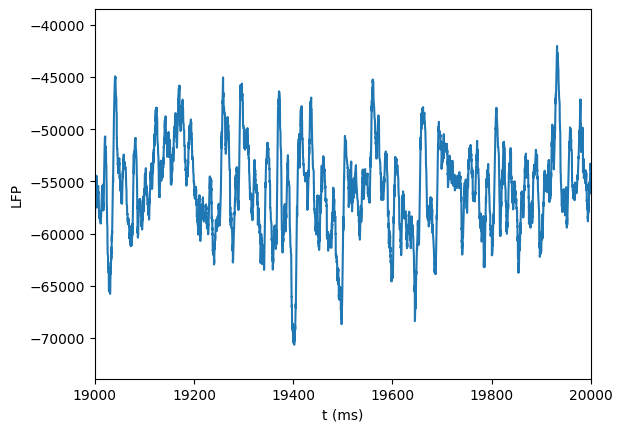

In [13]:
from pfc_model.analysis import *

tLFP, LFP = get_LFP(cortex)
plt.plot(tLFP, LFP)
plt.xlabel('t (ms)')
plt.ylabel('LFP')
plt.xlim(19000, 20000)
plt.show()

get_LFP_SPD fom pfc_model.analysis plots a log-log SPD plot.

Text(0, 0.5, 'log[power]')

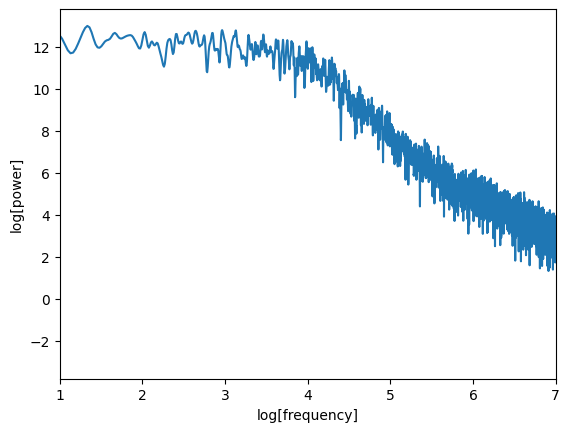

In [14]:
fq, pwr = get_LFP_SPD(cortex, log=True, sigma=2)
plt.plot(fq, pwr)
plt.xlim(1,7)
plt.xlabel('log[frequency]')
plt.ylabel('log[power]')

In [ ]:
syn_idc = 54
ta_syn = cortex.recorded.a_syn.t/br2.ms
a_syn = cortex.recorded.a_syn.a_syn[syn_idc]
plt.plot(ta_syn, a_syn)
plt.xlabel('t (ms)')
plt.ylabel('a_syn')